In [1]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [7]:
def twoD_Gaussian_multicomp((x, y), amplitude1, xo1, yo1, sigma_x1, sigma_y1, theta1, offset1,
                           amplitude2, xo2, yo2, sigma_x2, sigma_y2, theta2, offset2):
    
    
    xo1 = float(xo1)
    yo1 = float(yo1)    
    a1 = (np.cos(theta1)**2)/(2*sigma_x1**2) + (np.sin(theta1)**2)/(2*sigma_y1**2)
    b1 = -(np.sin(2*theta1))/(4*sigma_x1**2) + (np.sin(2*theta1))/(4*sigma_y1**2)
    c1 = (np.sin(theta1)**2)/(2*sigma_x1**2) + (np.cos(theta1)**2)/(2*sigma_y1**2)
     
    g1 = offset1 + amplitude1*np.exp( - (a1*((x-xo1)**2) + 2*b1*(x-xo1)*(y-yo1) + c1*((y-yo1)**2)))
    
    
    xo2 = float(xo2)
    yo2 = float(yo2)    
    a2 = (np.cos(theta2)**2)/(2*sigma_x2**2) + (np.sin(theta2)**2)/(2*sigma_y2**2)
    b2 = -(np.sin(2*theta2))/(4*sigma_x2**2) + (np.sin(2*theta2))/(4*sigma_y2**2)
    c2 = (np.sin(theta2)**2)/(2*sigma_x2**2) + (np.cos(theta2)**2)/(2*sigma_y2**2)
     
    g2 = offset2 + amplitude2*np.exp( - (a2*((x-xo2)**2) + 2*b2*(x-xo2)*(y-yo2) + c2*((y-yo2)**2)))
    
    
    g = g1 + g2
    
    return g.ravel()

In [8]:
file = open("test_order1.txt", "r")
test_image = pickle.load(file)
file.close()

(178, 20)


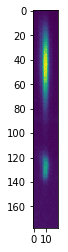

In [9]:
plt.imshow(test_image)
print test_image.shape

In [10]:
initial_guess = [800, 10, 45, 5, 25, 0, 20,
                500, 10, 120, 5, 10, 0, 20]
x = np.arange(0, 20)
y = np.arange(0, 178)
x,y = np.meshgrid(x, y)
popt, pcov = opt.curve_fit(twoD_Gaussian_multicomp, (x,y), test_image.flatten(), p0 = initial_guess)

/home/kyle/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  after removing the cwd from sys.path.


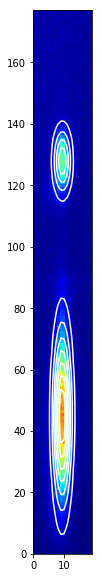

In [11]:
data_fitted = twoD_Gaussian_multicomp((x, y), *popt)

fig, ax = plt.subplots(1, 1, figsize=(8,10))
ax.hold(True)
ax.imshow(test_image.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=1000)
ax.contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
plt.show()

In [12]:
print (initial_guess-popt)/popt

[ 0.02677629  0.06397197  0.00522062  1.67447759  0.39726733 -1.
 -1.00000445  0.06726685  0.05731003 -0.06160666  1.66830232  0.45627322
 -1.         -0.99999555]


In [13]:
print popt

[ 7.79137584e+02  9.39874386e+00  4.47662921e+01  1.86952399e+00
  1.78920666e+01  8.14656872e-04 -4.49056724e+06  4.68486396e+02
  9.45796379e+00  1.27878146e+02  1.87385064e+00  6.86684329e+00
  4.40487074e-04  4.49059165e+06]


In [14]:
print pcov.diagonal() / popt

[ 5.72631558e-03  2.72484278e-06  5.25245185e-05  1.48664641e-05
  1.42959931e-04  2.00614141e-04 -1.14423932e+08  2.46757721e-02
  1.95593375e-05  1.94230517e-05  1.01971295e-04  3.73510101e-04
  1.90440447e-02  1.14423312e+08]


/home/kyle/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kyle/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  if __name__ == '__main__':
/home/kyle/.local/lib/python2.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  app.launch_new_instance()


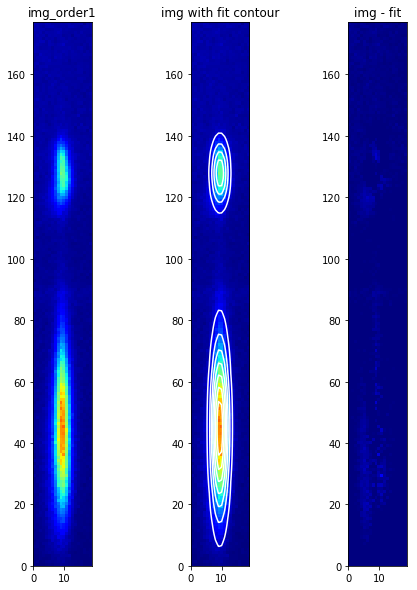

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(8,10))

ax[0].hold(True)
ax[0].imshow(test_image.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=1000)
#ax.contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
ax[0].set_title("img_order1")

ax[1].hold(True)
ax[1].imshow(test_image.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=1000)
ax[1].contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
ax[1].set_title("img with fit contour")


ax[2].hold(True)
ax[2].imshow(test_image.reshape(178, 20)-data_fitted.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=1000)
#ax.contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
ax[2].set_title("img - fit")
plt.savefig("sub_order1.png", dpi=300)
plt.show()


In [16]:
file = open("test_order2.txt", "r")
test_image = pickle.load(file)
file.close()

(178, 20)


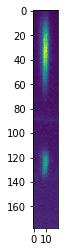

In [17]:
plt.imshow(test_image)
print test_image.shape

In [18]:
initial_guess = [250, 10, 30, 5, 25, 0, 20,
                150, 10, 120, 5, 10, 0, 20]
x = np.arange(0, 20)
y = np.arange(0, 178)
x,y = np.meshgrid(x, y)
popt, pcov = opt.curve_fit(twoD_Gaussian_multicomp, (x,y), test_image.flatten(), p0 = initial_guess)

/home/kyle/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  after removing the cwd from sys.path.


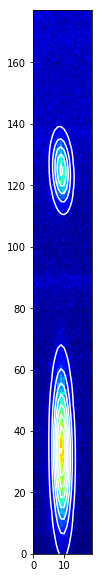

In [19]:
data_fitted = twoD_Gaussian_multicomp((x, y), *popt)

fig, ax = plt.subplots(1, 1, figsize=(8,10))
ax.hold(True)
ax.imshow(test_image.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=350)
ax.contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(8,10))

ax[0].hold(True)
ax[0].imshow(test_image.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=350)
#ax.contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
ax[0].set_title("img_order2")

ax[1].hold(True)
ax[1].imshow(test_image.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=350)
ax[1].contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
ax[1].set_title("img with fit contour")


ax[2].hold(True)
ax[2].imshow(test_image.reshape(178, 20)-data_fitted.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=350)
#ax.contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
ax[2].set_title("img - fit")
plt.savefig("sub_order2.png", dpi=300)
plt.show()


In [ ]:
file = open("trace_order.txt", "r")
test_image = pickle.load(file)
file.close()

plt.imshow(test_image)
print test_image.shape

In [ ]:

fig, ax = plt.subplots(1, 3, figsize=(8,10))

ax[0].hold(True)
ax[0].imshow(test_image.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=350)
#ax.contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
ax[0].set_title("trace_order")

ax[1].hold(True)
ax[1].imshow(test_image.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=350)
ax[1].contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
ax[1].set_title("img with order2 fit contour")


ax[2].hold(True)
ax[2].imshow(test_image.reshape(178, 20)-data_fitted.reshape(178, 20), cmap=plt.cm.jet, origin='bottom',
    extent=(x.min(), x.max(), y.min(), y.max()), vmin=0, vmax=350)
#ax.contour(x, y, data_fitted.reshape(178, 20), 8, colors='w')
ax[2].set_title("img - order 2 fit")
plt.savefig("sub_trace.png", dpi=300)
plt.show()
